# 1. Load packages and data

### 1.1. Packages

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
from multiprocessing import Pool, cpu_count

### 1.2. Paths

In [51]:
# Define the path to synchronized data directory
script_dir = os.path.dirname(os.path.abspath('__file__'))
synchronized_dir = os.path.join(script_dir, '..', '..', 'synchronized')
appended_dir = os.path.join(script_dir, '..', '..', 'appended')

### 1.3. Data

In [ ]:
# Parallel file reading function
def read_synced_file(file_path):
    df = pd.read_csv(file_path, parse_dates=['utc_timestamp'], date_format='ISO8601')
    print(f'Read {os.path.basename(file_path)}: {df.shape}')
    return df

# Get all CSV files in synchronized directory (already rted chronologically)
print(f'Looking for synchronized files in: {synchronized_dir}')
all_files = sorted(glob.glob(os.path.join(synchronized_dir, 'synced_*.csv')))
print(f'Found {len(all_files)} synchronized files')

# Read files in parallel using all CPU cores minus 1
with Pool(cpu_count() - 1) as pool:
    dfs = pool.map(read_synced_file, all_files)

# Concatenate all dataframes at once (preserving chronological order)
full_synced_df = pd.concat(dfs, ignore_index=True)
print(f'Total shape after appending: {full_synced_df.shape}')
print(f'Date range: {full_synced_df["utc_timestamp"].min()} to {full_synced_df["utc_timestamp"].max()}')

# Display first few rows
full_synced_df.head()

In [58]:
full_synced_df[["0::0::0::0_0::0::0::0::0_0::0::0::0_2", "0::0::0::0_0::0::0::0::0_0::0::0::0_3", "0::0::0::0_0::0::0::0::0_0::0::0::0_4"]].describe()

,0::0::0::0_0::0::0::0::0_0::0::0::0_2,0::0::0::0_0::0::0::0::0_0::0::0::0_3,0::0::0::0_0::0::0::0::0_0::0::0::0_4
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [53]:
full_unsynced_df = pd.read_csv(os.path.join(appended_dir, 'excl_noon_reports.csv'), parse_dates=['utc_timestamp'], date_format='ISO8601')
full_unsynced_df.head()

,utc_timestamp,qid_mapping,value,quantity_name,source_name,unit,time_delta_sec
0,2024-01-01 00:00:00+00:00,4::0::8::0_1::1::0::7::0_56::0::3::0_8,-0.4000,Vessel External Conditions Eastward Sea Water ...,Provider S,m/s,NaN
1,2024-01-01 00:00:00+00:00,4::0::4::0_1::1::0::7::0_56::0::4::0_8,0.0000,Vessel External Conditions Northward Sea Water...,Provider MB,m/s,NaN
2,2024-01-01 00:00:00+00:00,4::0::4::0_1::1::0::7::0_45::0::1::0_8,2.7000,Vessel External Conditions Wave Significant He...,Provider MB,m,NaN
3,2024-01-01 00:00:00+00:00,4::0::8::0_1::1::0::7::0_56::0::5::0_8,0.5391,Vessel External Conditions Eastward Wind Velocity,Provider S,m/s,NaN
4,2024-01-01 00:00:00+00:00,4::0::4::0_1::1::0::7::0_2::0::15::21_8,79.0000,Vessel External Conditions Wind True Angle,Provider MB,degrees,NaN


In [54]:
full_unsynced_df['qid_mapping'].unique()

<StringArray>
[ '4::0::8::0_1::1::0::7::0_56::0::3::0_8',
  '4::0::4::0_1::1::0::7::0_56::0::4::0_8',
  '4::0::4::0_1::1::0::7::0_45::0::1::0_8',
  '4::0::8::0_1::1::0::7::0_56::0::5::0_8',
 '4::0::4::0_1::1::0::7::0_2::0::15::21_8',
  '4::0::4::0_1::1::0::7::0_45::0::2::0_8',
  '4::0::8::0_1::1::0::7::0_4::0::12::0_8',
 '4::0::8::0_1::1::0::7::0_2::0::18::21_8',
  '4::0::4::0_1::1::0::7::0_56::0::3::0_8',
  '4::0::8::0_1::1::0::7::0_40::0::2::0_8',
  '4::0::4::0_1::1::0::7::0_1::0::4::21_8',
  '4::0::8::0_1::1::0::7::0_56::0::4::0_8',
  '4::0::8::0_1::1::0::7::0_45::0::1::0_8',
  '4::0::8::0_1::1::0::7::0_56::0::6::0_8',
   '2::0::6::1_1::1::0::2::0_1::0::1::0_8',
  '2::0::7::0_1::1::0::2::0_1::0::5::11_8',
  '2::0::1::0_1::1::0::7::0_1::0::4::22_8',
 '2::0::1::0_1::1::0::7::0_2::0::15::22_8',
  '2::0::4::0_1::1::0::2::0_37::0::2::0_8',
  '2::0::5::0_1::1::0::2::0_2::0::8::21_8',
   '2::0::5::0_1::1::0::2::0_6::0::1::0_8',
  '1::0::15::0_1::2::0::3::0_1::0::6::0_8',
  '1::0::14::0_1::

In [55]:
full_synced_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 41983 entries, 0 to 41982
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype              
---  ------                                   --------------  -----              
 0   utc_timestamp                            41983 non-null  datetime64[us, UTC]
 1   seg_id                                   41983 non-null  int64              
 2   2::0::6::1_1::1::0::2::0_1::0::1::0_8    41966 non-null  float64            
 3   2::0::7::0_1::1::0::2::0_1::0::5::11_8   41966 non-null  float64            
 4   2::0::1::0_1::1::0::7::0_1::0::4::22_8   41966 non-null  float64            
 5   2::0::1::0_1::1::0::7::0_2::0::15::22_8  41966 non-null  float64            
 6   2::0::5::0_1::1::0::2::0_2::0::8::21_8   41958 non-null  float64            
 7   2::0::5::0_1::1::0::2::0_6::0::1::0_8    41958 non-null  float64            
 8   1::0::15::0_1::2::0::3::0_1::0::6::0_8   41961 non-null  float64            


# 2. Compare timeline from synced file to original data to see if it lines up

In [44]:
# Definitions
variable_of_interest_qid = "2::0::11::0_1::1::0::3::0_15::0::1::0_8"
sensor_qids = [
    "3::0::1::0_1::1::0::2::0_11::0::2::0_8",
    "3::0::1::0_1::1::0::2::0_11::0::1::0_8",
    "3::0::1::0_1::2::0::8::0_1::0::6::0_8",
    "3::0::1::0_1::1::0::2::0_11::0::3::0_8",
    "3::0::1::0_1::1::0::2::0_11::0::4::0_8",
    "2::0::1::0_1::1::0::7::0_1::0::4::22_8",
    "2::0::1::0_1::1::0::7::0_2::0::15::22_8",
    "2::0::6::1_1::1::0::2::0_1::0::1::0_8",
    "2::0::5::0_1::1::0::2::0_6::0::1::0_8",
    "2::0::5::0_1::1::0::2::0_2::0::8::21_8",
    "2::0::25::0_1::2::0::3::0_1::0::6::0_8",
    "2::0::7::0_1::1::0::2::0_1::0::5::11_8",
    "2::0::11::0_1::2::0::8::0_22::0::1::1_8",
    "2::0::11::0_1::1::0::3::0_14::0::1::0_8",
    "2::0::11::0_1::1::0::3::0_1::0::6::0_8",
    "2::0::11::0_1::1::0::3::0_12::0::2::0_8",
    "2::0::11::0_1::1::0::3::0_17::0::1::0_8",
    "2::0::11::0_1::1::0::3::0_15::0::1::0_8",
    "2::0::11::0_1::1::0::3::0_12::0::1::0_8",
    "1::0::25::0_1::2::0::8::0_20::0::1::0_8",
    "1::0::14::0_1::2::0::8::0_3::0::3::0_8",
    "1::0::15::0_1::2::0::3::0_1::0::6::0_8"
]
start_time = pd.to_datetime("2024-01-01", utc=True)
end_time = pd.to_datetime("2024-01-31", utc=True)

In [45]:
# Data filtering
def filter_data_by_time_and_qid(synced_df, unsynced_df, qid, start_time, end_time):
    # Filter synced dataframe by time AND keep only rows where the qid column has data (not NaN)
    synced_filtered = synced_df[
        (start_time <= synced_df['utc_timestamp']) & 
        (synced_df['utc_timestamp'] <= end_time) &
        (synced_df[qid].notna())
    ][['utc_timestamp', qid]].copy()

    # Filter unsynced dataframe by time and qid_mapping value
    unsynced_filtered = unsynced_df[
        (start_time <= unsynced_df['utc_timestamp']) &
        (unsynced_df['utc_timestamp'] <= end_time) & 
        (unsynced_df['qid_mapping'] == qid)
    ][['utc_timestamp', 'value']].copy()

    # Rename unsynced 'value' column to match qid name
    unsynced_filtered = unsynced_filtered.rename(columns={'value': qid})

    return synced_filtered, unsynced_filtered

def plot_synced_vs_unsynced(synced_series, unsynced_series, qid):
    plt.figure(figsize=(12, 6))
    plt.plot(synced_series['utc_timestamp'], synced_series[qid], label='Synced')
    plt.plot(unsynced_series['utc_timestamp'], unsynced_series[qid], label='Unsynced')
    plt.title(f'Time Series Comparison for {qid}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()


KeyError: '2::0::25::0_1::2::0::3::0_1::0::6::0_8'

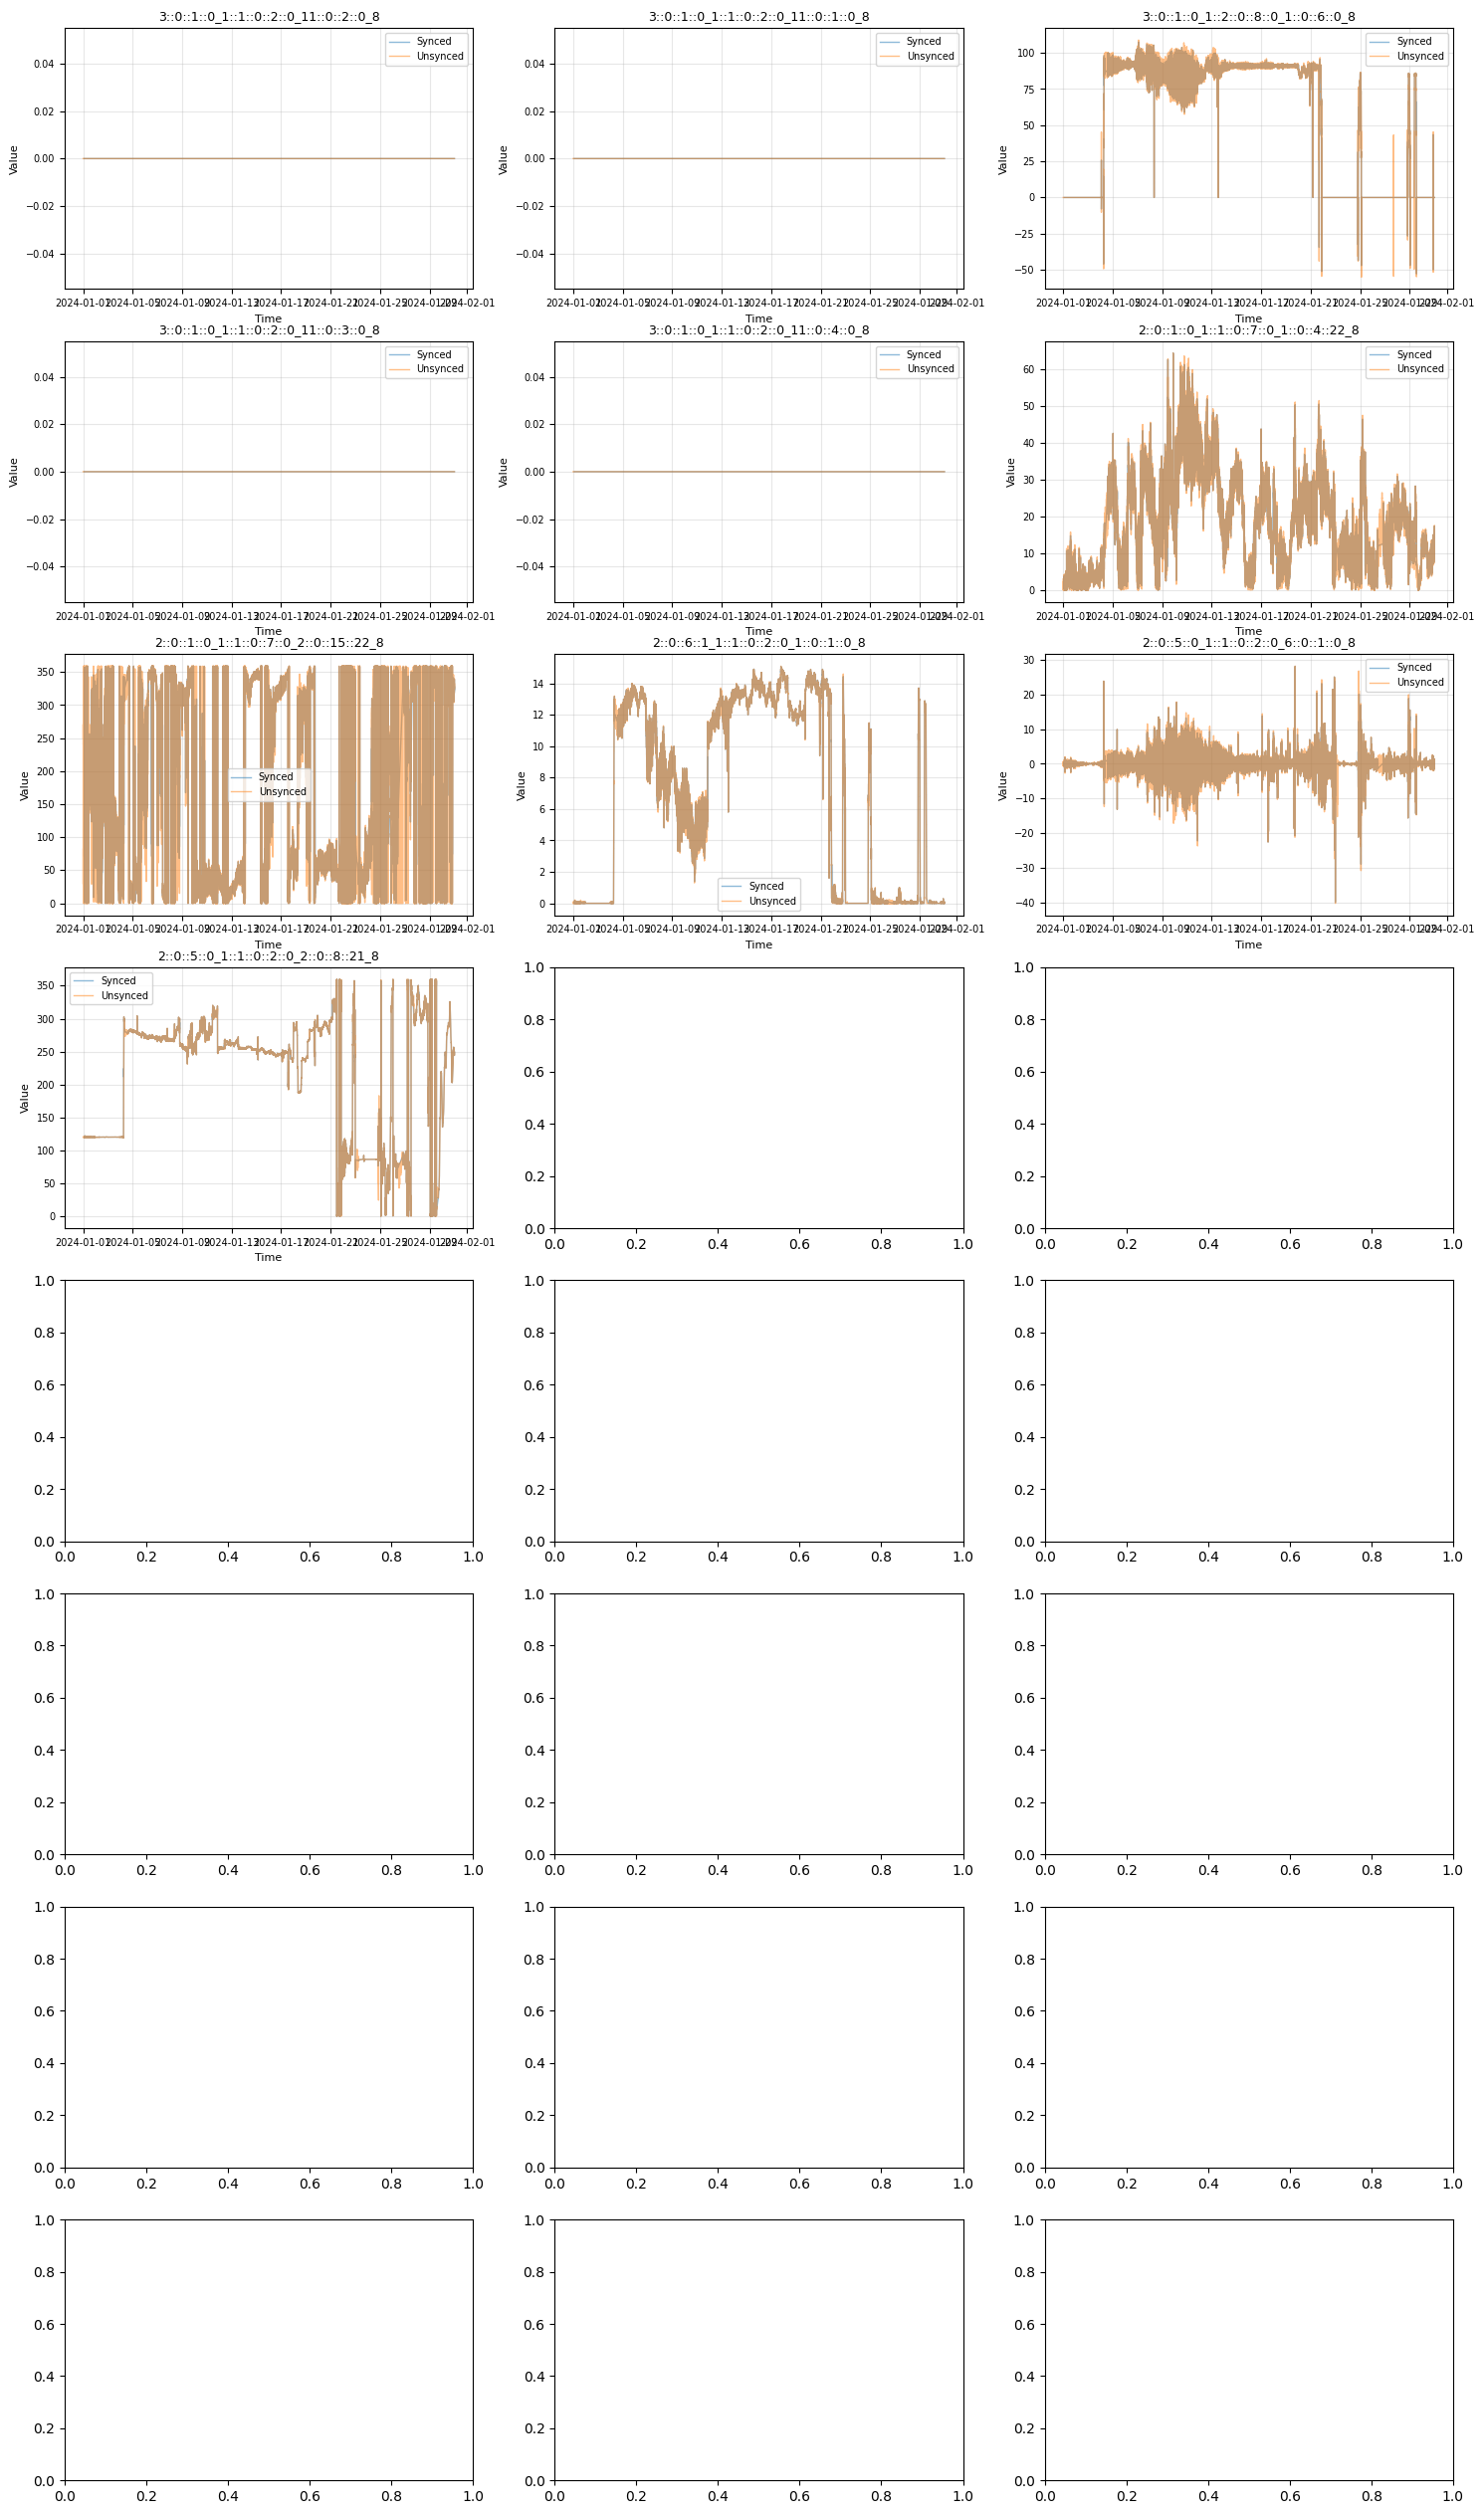

In [ ]:

# Loop through each sensor qid, filter data, and plot on a grid with rows of 3 
fig, axes = plt.subplots(nrows=(len(sensor_qids) + 2) // 3, ncols=3, figsize=(18, 4 * ((len(sensor_qids) + 2) // 3)))
axes = axes.flatten()  # Flatten to 1D array for easy indexing
for idx, qid in enumerate(sensor_qids):
    synced_filtered, unsynced_filtered = filter_data_by_time_and_qid(full_synced_df, full_unsynced_df, qid, start_time, end_time)
    axes[idx].plot(synced_filtered['utc_timestamp'], synced_filtered[qid], label='Synced', linewidth=1, alpha=1)
    axes[idx].plot(unsynced_filtered['utc_timestamp'], unsynced_filtered[qid], label='Unsynced', linewidth=1, alpha=1)
    axes[idx].set_title(f'{qid}', fontsize=9)
    axes[idx].set_xlabel('Time', fontsize=8)
    axes[idx].set_ylabel('Value', fontsize=8)
    axes[idx].legend(fontsize=7)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(labelsize=7)

# Hide unused subplots
for idx in range(len(sensor_qids), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# 3. Check that distributions of values roughly resemble those in the original version

In [ ]:
# TODO: check that the distributions of values roughly resembles those in the original exploration


# 4. Check distribution of stretch durations

In [ ]:
# TODO: (optional) check distribution of stretch durations